# Tarea de selección de variables

## Importamos las librerías necesarias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
import math

## Cargamos los datos

In [5]:
np.random.seed(1)
wine_df = pd.read_csv('wine/winequality-white.csv', sep=';')
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
def CFS(df, attributes, class_v):
    """Realiza el método CFS
    
        :param df: Dataframe de Pandas con el dataset a tratar
        :param attributes: Lista de los nombres de las columnas a tratar
        :param class_v: Nombre de la columna a tratar como clase
        :type df: <class 'pandas.core.frame.DataFrame'>
        :type attributes: str list
        :type class_v: str
        :return: Retorna el valor de calidad de selección los atributos con respecto a la clase
        :rtype: double

    """
    rca = df[attributes + [class_v]].corr().abs()[class_v].iloc[:-1].mean()
    raa = df[attributes].corr().abs()[attributes].mean().mean()
    k = len(attributes)
    return (k*rca)/math.sqrt(k+(k*(k-1)*raa))

In [19]:
def MIFS(df, attributes, class_v, beta=1):
    """Realiza el método MIFS
    
        :param df: Dataframe de Pandas con el dataset a tratar
        :param attributes: Lista de los nombres de las columnas a tratar
        :param class_v: Nombre de la columna a tratar como clase
        :type df: <class 'pandas.core.frame.DataFrame'>
        :type attributes: str list
        :type class_v: str
        :return: Retorna el valor de calidad de selección los atributos con respecto a la clase
        :rtype: double

    """
    df2 = df.copy()
    I = mutual_info_classif(df2[attributes], df2[class_v].astype(str))[-1]
    if len(attributes) == 1:
        return I
    return I - beta * np.sum(mutual_info_regression(df2.loc[:, attributes[:-1]], df2.loc[:, attributes[-1]]))


In [20]:
def SFS(dataframe, features=4, metric='cfs'):
    """Realiza el método de búsqueda SFS
    
        :param dataframe: Dataframe de Pandas con el dataset a tratar
        :param features: Número de variables que se desean obtener
        :param metric: Nombre de la métrica a usar para la evaluación de calidad
        :type dataframe: <class 'pandas.core.frame.DataFrame'>
        :type features: int
        :type metric: str ('cfs' o 'mifs')
        :return: Retorna una lista con los nombres de las variables seleccionadas
        :rtype: str list

    """
    df = dataframe.copy()
    xk = []
    k = 0

    while k < features:
        k = k+1
        values = []
        unexplored_set = np.setdiff1d(df.columns[:-1], xk)
        for x in unexplored_set:
            criterion = CFS(df, xk + [x], 'quality') if metric == 'cfs' else MIFS(df, xk + [x], 'quality')
            values.append(criterion)

        xk.append(unexplored_set[values.index(max(values))])
    
    print(f'End SFS with {features} variables')
    return xk

In [21]:
cfs_results = {}
for i in range(1, wine_df.shape[1]-1):
    cfs_results[i] = SFS(wine_df, i, "cfs")

End SFS with 1 variables
End SFS with 2 variables
End SFS with 3 variables
End SFS with 4 variables
End SFS with 5 variables
End SFS with 6 variables
End SFS with 7 variables
End SFS with 8 variables
End SFS with 9 variables
End SFS with 10 variables


In [22]:
mifs_results = {}
for i in range(1, wine_df.shape[1]-1):
    mifs_results[i] = SFS(wine_df, i, "mifs")

End SFS with 1 variables
End SFS with 2 variables
End SFS with 3 variables
End SFS with 4 variables
End SFS with 5 variables
End SFS with 6 variables
End SFS with 7 variables
End SFS with 8 variables
End SFS with 9 variables
End SFS with 10 variables


## Resultados

In [23]:
for i in range(1, wine_df.shape[1]-1):
    print(f'Nº de variables:\n{i}\n')
    print(f'Resultado en CFS:\n{cfs_results[i]}\n')
    print(f'Resultado en MIFS:\n{mifs_results[i]}')
    print('----------------------------------------------------------------------------------------------------------')

Nº de variables:
1

Resultado en CFS:
['alcohol']

Resultado en MIFS:
['density']
----------------------------------------------------------------------------------------------------------
Nº de variables:
2

Resultado en CFS:
['alcohol', 'density']

Resultado en MIFS:
['density', 'volatile acidity']
----------------------------------------------------------------------------------------------------------
Nº de variables:
3

Resultado en CFS:
['alcohol', 'density', 'volatile acidity']

Resultado en MIFS:
['density', 'volatile acidity', 'fixed acidity']
----------------------------------------------------------------------------------------------------------
Nº de variables:
4

Resultado en CFS:
['alcohol', 'density', 'volatile acidity', 'chlorides']

Resultado en MIFS:
['density', 'volatile acidity', 'fixed acidity', 'sulphates']
----------------------------------------------------------------------------------------------------------
Nº de variables:
5

Resultado en CFS:
['alcohol', '

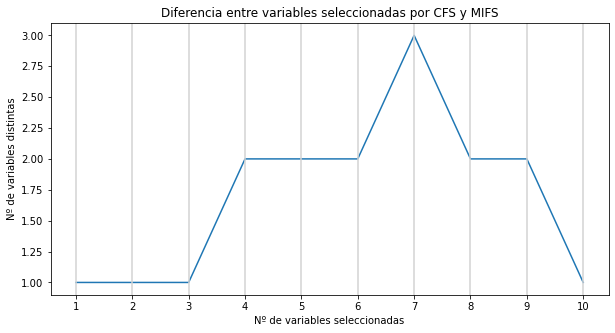

In [45]:
plt.figure(figsize=(10, 5))
p_miss = []

for i in range(1, wine_df.shape[1]-1):
    p_miss.append(len(np.setdiff1d(cfs_results[i], mifs_results[i])))

    
plt.plot(range(1, wine_df.shape[1]-1), p_miss)
plt.title('Diferencia entre variables seleccionadas por CFS y MIFS')
plt.xlabel("Nº de variables seleccionadas")
plt.xticks(range(1, wine_df.shape[1]-1))
for i in range(1, wine_df.shape[1]-1):
    plt.axvline(i, color='lightgray')
plt.ylabel("Nº de variables distintas")
plt.show()

## Conclusiones

Como se nos muestra en la figura superior, existe basntantes diferencias entre los métodos en cuanto a la selección de variables a medida que deseamos seleccionar más variables.

Por otra parte, debemos tener encuenta que ambos métodos difieren prácticamente siempre en el orden en el que escogen las variables, dándose en nuestro caso que las únicas variables medianamente cercanas son 'density', 'volatile acidity' y 'fixed acidity'.